# import all libiraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from keras.datasets import mnist
from keras.utils import to_categorical
import cv2

Using TensorFlow backend.


# loading the model and the weights

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28,28,1);y_train = to_categorical(y_train)
x_test = x_test.reshape(-1,28,28,1);y_test = to_categorical(y_test)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

###  this is CNN i trained before on the mnist data so i am using it again

In [4]:
from keras.models import model_from_json

with open('model.json','r') as m:
    model = model_from_json(m.read())


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.load_weights('model.h5')

In [5]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 60s 6ms/step


[0.005450835164331147, 0.9984]

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
__________

# Testing the model for one digit image 

[[2.1532664e-17 3.5282521e-09 1.1295463e-05 3.4357366e-09 6.3797363e-11
  1.3664557e-10 1.8958515e-14 4.7963586e-13 9.9998868e-01 6.1618717e-11]]
8


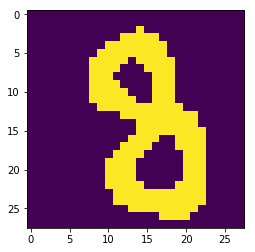

In [135]:
img = cv2.imread("images/number.jpg")
img = cv2.resize(img, (28,28), interpolation = cv2.INTER_AREA)

im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (3, 3), 0)
#ret, im_th = cv2.threshold(im_gray, 60, 255, cv2.THRESH_BINARY_INV)

im_th = cv2.adaptiveThreshold(im_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,9,7)

plt.imshow(im_th.reshape(28,28))
#cv2.imwrite('images/new_image_for_testing.jpg',img)
    
    
prediction = model.predict((im_th.astype('float32') / 255).reshape(-1,28,28,1))
print(prediction)
print(np.argmax(prediction))

# Testing on multidigit images

6
(201, 419)


True

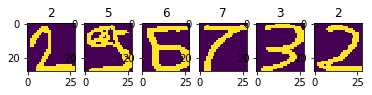

In [199]:
img = cv2.imread("images/image.jpg")

im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (3, 3), 0)
im_th = cv2.adaptiveThreshold(im_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,9,7)


c,ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
rects = [cv2.boundingRect(ctr) for ctr in ctrs]    


j=1
print(len(rects))
print(im_th.shape)
for rect in rects:
    plt.subplot(1,len(rects),j)
    pred_img = im_th[rect[1]-4:(rect[1]+ rect[3]),rect[0]-4:(rect[0]+ rect[2])]
    pred_img = cv2.resize(pred_img,(28,28))
    
    
    pred_img = cv2.GaussianBlur(pred_img, (3, 3), 0)
    ret, pred_img = cv2.threshold(pred_img, 127, 255, cv2.THRESH_BINARY)
    
    
    
    img = cv2.rectangle(img, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3)
    prediction = model.predict((pred_img / 255).reshape(1,28,28,1))
    #print(prediction)
    #print(np.argmax(prediction))
    plt.title(str(np.argmax(prediction)))
    plt.imshow(pred_img)
    j+=1

cv2.imwrite('images2/rectangle_images.jpg',img)


#prediction = model.predict((im_th.astype('float32') / 255).reshape(-1,28,28,1))
#print(prediction)
#print(np.argmax(prediction))

#  Testing on multidigit images (2)

In [216]:
img = cv2.imread("images/image.jpg")

im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (3, 3), 0)
im_th = cv2.adaptiveThreshold(im_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,9,7)


c,ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
rects = [cv2.boundingRect(ctr) for ctr in ctrs]    




for rect in rects:
    print(rect)
    pred_img = im_th[rect[1]:(rect[1]+ rect[3]),rect[0]:(rect[0]+ rect[2])]
    pred_img = cv2.resize(pred_img,(28,28))
    
    
    pred_img = cv2.GaussianBlur(pred_img, (3, 3), 0)
    ret, pred_img = cv2.threshold(pred_img, 127, 255, cv2.THRESH_BINARY)
    
    
    
    img = cv2.rectangle(img, (rect[0]-4, rect[1]-4), (rect[0] + rect[2]-4, rect[1] + rect[3]-4), (0, 255, 0), 1)
    prediction = model.predict((pred_img / 255).reshape(1,28,28,1))
    #print(prediction)
    #print(np.argmax(prediction))
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.putText(img,str(np.argmax(prediction)),(rect[0],rect[1]),font,0.7,(0,0,255),3 )
    

cv2.imwrite('images2/rectangle_images.jpg',img)


#prediction = model.predict((im_th.astype('float32') / 255).reshape(-1,28,28,1))
#print(prediction)
#print(np.argmax(prediction))

(169, 126, 80, 67)
(23, 117, 62, 84)
(347, 32, 46, 77)
(232, 17, 52, 89)
(122, 17, 48, 96)
(15, 13, 58, 74)


True

# testing 3 

### fixing problem in the previous one

In [8]:
from math import sqrt
img = cv2.imread("images/image.jpg")

im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (3, 3), 0)
im_th = cv2.adaptiveThreshold(im_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,9,7)


c,ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
rects = [cv2.boundingRect(ctr) for ctr in ctrs]    


print("Number of digits : ",len(rects))
for rect in rects:
    shift = int(sqrt(max(rect[3],rect[2])))
    pred_img = im_th[rect[1]-shift:(rect[1]+ rect[3]+shift),rect[0]-shift:(rect[0]+ rect[2]+shift)]
    pred_img = cv2.resize(pred_img,(28,28))
    pred_img = pred_img/255.0

    
    img = cv2.rectangle(img, (rect[0]-shift, rect[1]-shift), (rect[0] + rect[2]+shift, rect[1] + rect[3]+shift), (0, 255, 0), 1)
    prediction = model.predict(pred_img.reshape(1,28,28,1))
    
    

    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.putText(img,str(np.argmax(prediction)),(rect[0],rect[1]),font,0.7,(0,0,255),2 )
    

cv2.imwrite('images2/rectangle_images.jpg',img)




Number of digits :  16


True

# showing some training data

### sohwing the data of the digit 6 to try to see why it's classified 5 sometimes

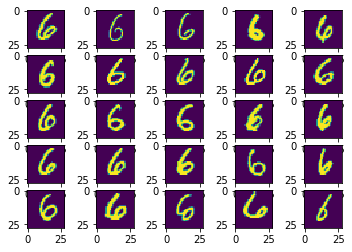

In [88]:
counter=1
lis = np.zeros((25,28,28))
for i in range(len(y_train)):
    if(np.argmax(y_train[i])==6):
        plt.subplot(5,5,counter)
        plt.imshow(x_train[i].reshape(28,28))
        lis[counter-1] = x_train[i].reshape(28,28)
        counter+=1
        if(counter==26):
            break

### sohwing the data of the digit 7 to try to see why it's classified 1 sometimes

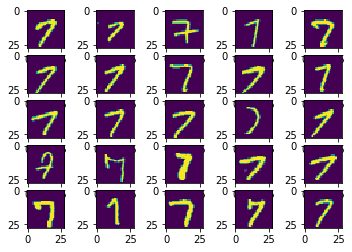

In [59]:
counter=1
lis = np.zeros((25,28,28))
for i in range(len(y_train)):
    if(np.argmax(y_train[i])==7):
        plt.subplot(5,5,counter)
        plt.imshow(x_train[i].reshape(28,28))
        lis[counter-1] = x_train[i].reshape(28,28)
        counter+=1
        if(counter==26):
            break

### sohwing the data of the digit 9 to try to see why it's classified 7 sometimes

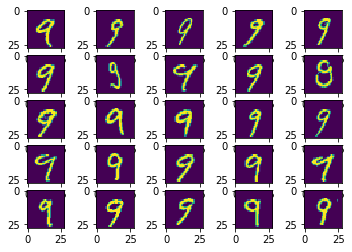

In [55]:
counter=1
for i in range(len(y_train)):
    if(np.argmax(y_train[i])==9):
        plt.subplot(5,5,counter)
        plt.imshow(x_train[i].reshape(28,28))
        counter+=1
        if(counter==26):
            break

9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


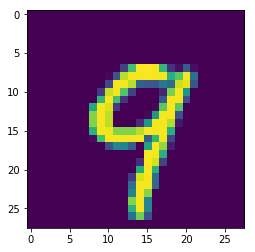

In [84]:
index=12
predict = model.predict(x_test[index].reshape(-1,28,28,1))
ans = y_test[index]


plt.imshow(x_test[index].reshape(28,28))
print(np.argmax(predict),ans)